In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
from scipy import stats

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


from matplotlib.markers import TICKDOWN

In [2]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [3]:
# Import Data
SABG_control_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_SABG_control_pred.xlsx", ["single_cell", "background"])
SABG_control_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_SABG_control_target.xlsx", ["single_cell", "background"])

SABG_dox_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_SABG_dox_pred.xlsx", ["single_cell", "background"])
SABG_dox_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220610_MSC_dox\Data\220610_dox_SABG_dox_target.xlsx", ["single_cell", "background"])

# Standardize Data to Background
SABG_control_pred["single_cell"].Mean = SABG_control_pred["single_cell"].Mean - np.mean (SABG_control_pred["background"].Mean)
SABG_control_target["single_cell"].Mean = SABG_control_target["single_cell"].Mean - np.mean (SABG_control_target["background"].Mean)
SABG_dox_pred["single_cell"].Mean = SABG_dox_pred["single_cell"].Mean - np.mean (SABG_dox_pred["background"].Mean)
SABG_dox_target["single_cell"].Mean = SABG_dox_target["single_cell"].Mean - np.mean (SABG_dox_target["background"].Mean)

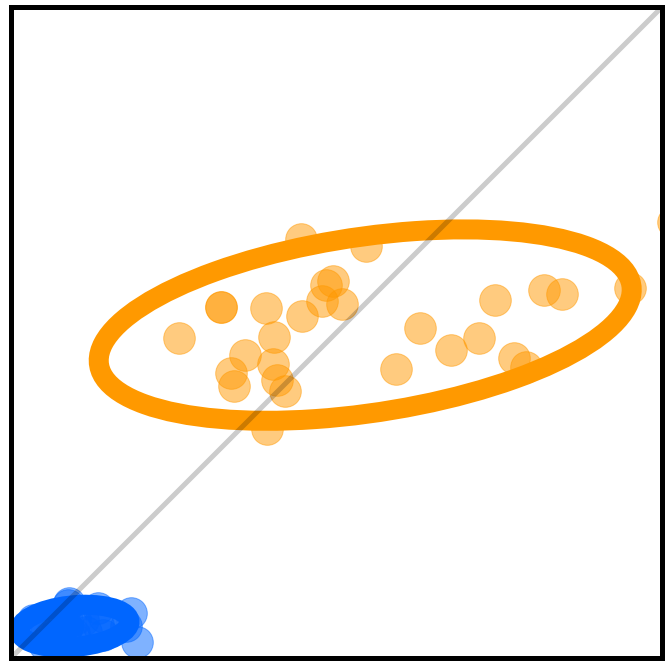

In [4]:
fig, axs = plt.subplots(figsize = [10,10])
axs.spines["top"].set_linewidth(5)
axs.spines["left"].set_linewidth(5)
axs.spines["right"].set_linewidth(5)
axs.spines["bottom"].set_linewidth(5)

plt.xlim(0,9)
plt.ylim(0,9)

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2, linewidth = 5)

# Plot Scatter Plots
plt.scatter(SABG_control_target["single_cell"].Mean, SABG_control_pred["single_cell"].Mean, c = "#0066ff", alpha = 0.5, label = " ", s=1000)
plt.scatter(SABG_dox_target["single_cell"].Mean, SABG_dox_pred["single_cell"].Mean, c = "#ff9900", alpha = 0.5, label = " ", s=1000)

# Plot Circles
confidence_ellipse (SABG_control_target["single_cell"].Mean, SABG_control_pred["single_cell"].Mean, ax = axs, n_std = 2.0, edgecolor = "#0066ff", linewidth=20)
confidence_ellipse (SABG_dox_target["single_cell"].Mean, SABG_dox_pred["single_cell"].Mean, ax = axs, n_std = 2.0, edgecolor = "#ff9900", linewidth=20)

# Plot Titles
# plt.title ("SABG")
# plt.xlabel ("Target Intensity", fontsize = 'small')
# plt.ylabel ("Prediction Intensity", fontsize = 'small')
# plt.legend()

axs.axes.xaxis.set_visible(False)
axs.axes.yaxis.set_visible(False)

# plt.legend(frameon=False, loc='upper left', fontsize = 40, labelspacing = 1, borderpad = 0.5, handlelength = 2)

plt.tight_layout()
plt.savefig(fname="SABG")

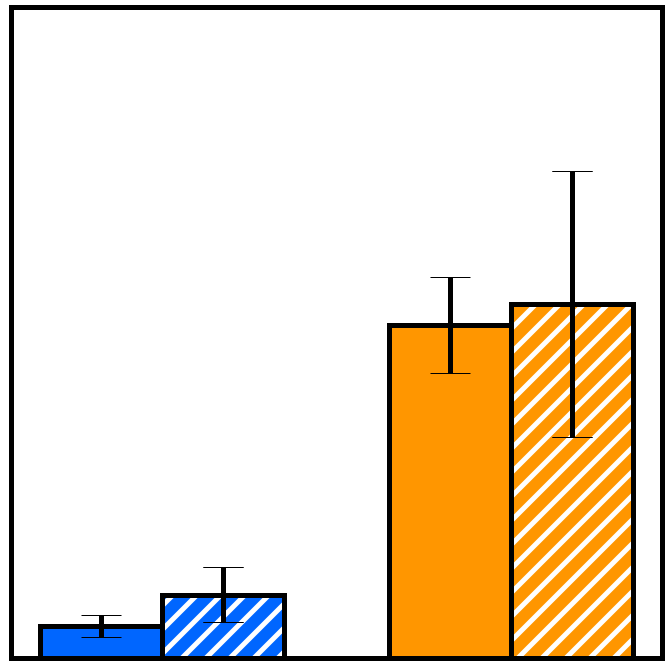

In [8]:
# Constants
indexes = np.arange(2)
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [10,10])

plt.ylim(0,9)

ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.rcParams['hatch.linewidth'] = 5

# Plot Barplot
error_config = dict(elinewidth = 5, ecolor = '0', capsize = 20)
ax.bar(0, SABG_control_pred["single_cell"].Mean.mean(), bar_width, yerr = SABG_control_pred["single_cell"].Mean.std(), error_kw = error_config, color = "#0066ff", edgecolor = "black", linewidth = 5)
ax.bar(bar_width, SABG_control_target["single_cell"].Mean.mean(), bar_width, yerr = SABG_control_target["single_cell"].Mean.std(), error_kw = error_config, color = "#0066ff", hatch = "/", edgecolor = "white", linewidth = 5)
ax.bar(bar_width, SABG_control_target["single_cell"].Mean.mean(), bar_width, yerr = SABG_control_target["single_cell"].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

ax.bar(1, SABG_dox_pred["single_cell"].Mean.mean(), bar_width, yerr = SABG_dox_pred["single_cell"].Mean.std(), error_kw = error_config, color = "#ff9600", edgecolor = "black", linewidth = 5)
ax.bar(1+bar_width, SABG_dox_target["single_cell"].Mean.mean(), bar_width, yerr = SABG_dox_target["single_cell"].Mean.std(), error_kw = error_config, color = "#ff9600", hatch = "/", edgecolor = "white", linewidth = 5)
ax.bar(1+bar_width, SABG_dox_target["single_cell"].Mean.mean(), bar_width, yerr = SABG_dox_target["single_cell"].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

# Plot Titles
# ax.set_title("SABG")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
# ax.set_xticklabels(["Control", "Dox"])

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


# prediction_label = mpatches.Patch(facecolor='#0066ff', edgecolor = 'black', linewidth = 5)
# target_label = mpatches.Patch(facecolor='#0066ff', hatch = "/", edgecolor = 'black', linewidth = 5)
# plt.legend(handles=[prediction_label, target_label], frameon=False, loc='center left', fontsize = 70, borderpad = 0, labelspacing = 0, handlelength = 2)

plt.tight_layout()
plt.savefig(fname="SABG_bar")

In [6]:
stats.ttest_ind (SABG_control_pred["single_cell"].Mean, SABG_dox_pred["single_cell"].Mean)

Ttest_indResult(statistic=-33.6217799239528, pvalue=9.864805141763551e-40)

In [7]:
stats.ttest_ind (SABG_control_target["single_cell"].Mean, SABG_dox_target["single_cell"].Mean)

Ttest_indResult(statistic=-11.707140706277723, pvalue=6.556761507293291e-17)